In [1]:
############# 正弦函数预测(1 layer RNN) #############
#（1）构建RNN网络
#（2）training:构建优化器,迭代,加载正弦函数数据，定义loss，输出
#（3）防止梯度爆炸
#（4）testing
#（5）画图

In [2]:
import  numpy as np
import  torch
import  torch.nn as nn
import  torch.optim as optim
from    matplotlib import pyplot as plt

In [3]:
num_time_steps = 50
input_size = 1
hidden_size = 20
output_size = 1
lr=0.01

In [4]:
########构建RNN网络#######

class Net(nn.Module):

    def __init__(self, ):
        super(Net, self).__init__()

        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=1,
            batch_first=True,  #[batch,seq len ,word vector/feature dim]
        )

        # 正态分布的权值初始化
        for p in self.rnn.parameters():  #parameters:包含所有模型的迭代器.
            nn.init.normal_(p, mean=0.0, std=0.001)  #normal_：正态分布

        # 连接层，对数据做处理 [49,16]→[49,1]
        self.linear = nn.Linear(hidden_size, output_size)  # 对输入数据做线性变换y=Ax+b

    # 前向传播函数
    def forward(self, x, hidden_prev):

        out, hidden_prev = self.rnn(x, hidden_prev)  #前向网络参数：输入，h0

       # out:[b, seq, h],torch.Size([1, 49, 16])
       # ht:[b,num layers,hidden dim],torch.Size([1, 1, 16])
        out = out.view(-1, hidden_size)  #[b, seq, h]=>[seq, h]  torch.Size([49, 16])
        out = self.linear(out)  #torch.Size([49, 1])
        out = out.unsqueeze(dim=0) #torch.Size([1, 49, 1]),要个 y做一个MSE，所以增加的维度要一致
        return out, hidden_prev #torch.Size([1, 49, 1]),torch.Size([1, 1, 16])


In [5]:
########## 开始训练 ##############


model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr)

hidden_prev = torch.zeros(1, 1, hidden_size)  #h0:[b,num layers,hidden dim],[1,1,16]

In [6]:
for iter in range(6000):
    # np.random.randint(low, high=None, size=None)
    # 作用返回一个随机整型数，范围从低（包括）到高（不包括），即[low, high)。如果没有写参数high的值，则返回[0,low)的值。

    start = np.random.randint(3, size=1)[0]  # 返回[0,3)的随机整型数,size=1表示维度为1,[0]取第0维的数
    print(start)  # scalar

    time_steps = np.linspace(start, start + 10, num_time_steps)  # 等分数列，生成[start，start+10] 区间的50个等分数列
    # print(time_steps)  #(50,)
    data = np.sin(time_steps)  # 取正弦函数  (50,)
    data = data.reshape(num_time_steps, 1)  # (50, 1)
    x = torch.tensor(data[:-1]).float().view(1, num_time_steps - 1, 1)  # 第0-48的数字 x:(1,49,1)
    y = torch.tensor(data[1:]).float().view(1, num_time_steps - 1, 1)  # 第1-49的数字 y:(1,49,1)
    # 相当于用第0-48的数字预测第1-49的数字，往后预测1位

    output, hidden_prev = model(x, hidden_prev)  #将x和h0送进模型,得到output和ht

    # tensor.detach()
    # 返回一个新的tensor，从当前计算图中分离下来的，但是仍指向原变量的存放位置,
    # 不同之处只是requires_grad为false，得到的这个tensor永远不需要计算其梯度，不具有grad

    hidden_prev = hidden_prev.detach()


    loss = criterion(output, y) # compute MSE of output and y
    model.zero_grad()
    loss.backward()
######### 防止梯度爆炸  #########

    # for p in model.parameters():
    #     print(p.grad.norm())  #打印出现在的W.grad，经验来讲，如果大于等于50就有可能梯度爆炸，如果等于10左右，就ok
    #     torch.nn.utils.clip_grad_norm_(p, 10)  #采用clip 将梯度降成<10

    optimizer.step()

########### 进行测试 #########

    if iter % 500 == 0: #每100次输出结果
        print("Iteration: {} loss {}".format(iter, loss.item()))

0
Iteration: 0 loss 0.45906496047973633
1
0
2
0
1
1
1
2
1
0
1
0
0
1
0
2
0
2
1
1
0
1
2
0
2
2
1
2
2
1
0
1
0
1
1
0
1
1
1
0
1
2
1
0
2
1
2
0
0
1
2
0
1
0
1
0
2
0
2
2
1
1
1
1
2
1
0
2
0
2
0
0
0
2
0
2
2
1
2
1
1
2
2
1
0
1
2
0
2
0
2
1
1
1
0
1
1
1
0
1
2
2
1
2
1
1
1
0
0
0
0
1
0
0
0
2
2
1
2
1
2
1
1
0
2
2
2
1
1
2
0
1
0
2
1
2
1
1
0
0
0
0
0
2
1
2
1
1
1
0
2
0
2
0
0
2
1
1
2
2
1
0
2
0
1
0
2
0
0
1
2
0
2
2
0
2
2
1
1
0
0
1
0
1
1
2
1
2
2
2
1
2
2
0
2
1
2
0
0
2
1
0
2
2
1
1
1
1
1
2
2
0
2
1
1
1
1
0
2
1
1
2
2
1
1
2
1
1
1
0
0
2
2
1
0
2
0
0
0
0
0
1
1
0
1
1
2
0
2
0
0
2
2
0
1
0
2
1
1
0
2
0
2
0
2
2
2
2
0
2
1
0
1
1
0
2
1
0
0
2
1
0
1
2
1
0
1
0
2
1
1
1
1
0
2
0
2
1
1
2
2
2
0
1
0
0
1
0
0
2
1
2
2
1
1
2
0
1
1
0
1
2
0
0
2
0
0
2
2
1
1
0
0
1
0
2
0
0
0
2
1
2
1
2
0
1
1
2
0
2
2
2
2
0
0
0
1
2
0
0
2
2
0
2
2
0
1
0
0
1
0
2
2
2
1
2
0
0
1
1
2
0
1
0
1
2
2
1
0
0
1
2
1
1
1
2
1
0
2
1
1
0
0
2
0
2
0
2
1
1
2
2
0
2
2
1
1
2
2
2
2
1
2
0
1
1
1
0
2
0
1
2
0
1
2
2
0
1
0
1
0
2
2
2
2
1
0
0
0
1
1
1
2
2
0
1
2
2
0
1
2
2
0
2
2
2
2
0
2
0
2
2
1
1
2
0
0
1
0
2


2
0
1
0
1
0
0
0
0
0
0
1
1
0
1
2
2
2
2
1
2
0
0
0
1
1
2
2
0
2
2
2
0
2
0
2
1
2
0
1
0
1
0
1
2
2
0
1
0
0
2
0
2
0
2
1
Iteration: 4000 loss 0.0010364190675318241
1
1
1
2
1
2
0
1
1
2
1
1
1
1
1
1
0
1
1
2
0
1
0
2
0
1
2
2
0
0
1
1
2
2
2
1
2
2
1
2
1
1
2
2
1
0
0
1
0
0
0
0
0
2
2
2
1
1
2
2
1
0
1
0
1
1
2
2
2
0
1
2
1
2
2
0
1
0
0
2
0
2
1
0
0
0
2
0
0
1
0
1
2
1
1
0
0
2
2
1
0
1
1
0
0
1
0
1
1
2
0
2
1
2
1
2
0
1
2
1
1
0
0
0
2
0
0
0
0
0
1
2
1
2
2
0
2
1
2
2
2
1
1
2
2
0
2
2
2
0
2
2
0
0
0
1
2
2
2
0
1
1
0
2
2
0
2
2
1
1
0
2
2
1
2
2
0
0
0
0
1
1
2
1
2
2
2
0
1
1
1
2
2
0
0
0
2
1
0
1
2
1
2
2
0
0
2
0
1
1
1
0
2
1
2
1
1
1
1
0
2
0
1
0
2
1
2
2
0
1
1
0
2
1
0
2
2
0
2
2
0
0
0
0
0
2
2
2
2
2
2
2
2
2
0
0
2
2
2
1
0
1
2
0
1
0
1
2
2
1
0
2
1
1
1
0
1
1
2
0
1
2
0
1
1
1
0
0
0
1
0
2
2
1
2
0
1
1
0
1
0
0
1
2
0
2
1
2
2
1
0
0
1
1
2
1
2
1
1
1
1
1
2
0
2
0
0
2
0
1
2
0
2
2
0
2
0
0
0
2
0
0
2
2
0
1
1
0
1
0
1
1
1
0
1
2
2
0
2
0
1
1
0
1
0
0
2
1
0
1
2
2
2
2
0
0
0
1
2
0
2
1
0
0
1
2
0
0
1
0
1
1
0
1
0
2
1
1
0
2
0
0
2
0
0
0
2
0
0
0
2
1
0
1
1
0
0
1
2
0
1
1
2

In [7]:
#数据定义送进来
start = np.random.randint(3, size=1)[0]
time_steps = np.linspace(start, start + 10, num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps, 1)
x = torch.tensor(data[:-1]).float().view(1, num_time_steps - 1, 1)
y = torch.tensor(data[1:]).float().view(1, num_time_steps - 1, 1)

In [8]:
#测试
predictions = []                  # 先把预测的东西做一个空的数组
input = x[:, 0, :]                # x从[1,49,1]=>[1,1]
for _ in range(x.shape[1]):      # '_' 是一个循环标志
    input = input.view(1,1,1)  # x从[1,1]=>[1,1,1],即把seq变为1，曲线一个点一个点的动
    (pred, hidden_prev) = model(input, hidden_prev)
    input = pred                 # 接收刚才输出的pred，再次送入网络，seq为1，就可以实现一个点一个点的预测下去了。
    predictions.append(pred.detach().numpy().ravel()[0]) # append 用于在列表末尾添加新的对象, ravel展平, [0]取数值
                                # 也就是说，将得到的预测点一个一个展示出来

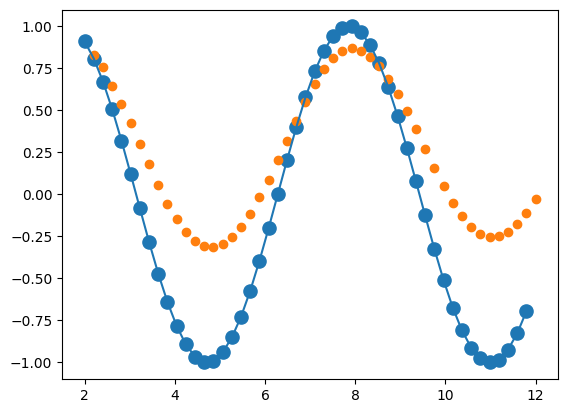

In [9]:
# 画图
x = x.data.numpy().ravel() #展平
y = y.data.numpy()
plt.scatter(time_steps[:-1], x.ravel(), s=90)  #原始X散点图 0-48, x,size=90
plt.plot(time_steps[:-1], x.ravel())  #原始X曲线图 0-48, x

plt.scatter(time_steps[1:], predictions) #预测曲线图 1-49, predictions,default size=20
#plt.scatter(time_steps[1:]) #预测曲线图 1-49, predictions,default size=20
plt.show()

In [10]:
start = np.random.randint(3, size=1)[0]  # 返回[0,3)的随机整型数,size=1表示维度为1,[0]取第0维的数
print(start)  # scalar

time_steps = np.linspace(start, start + 10, num_time_steps)  # 等分数列，生成[start，start+10] 区间的50个等分数列
print(time_steps)  #(50,)
data = np.sin(time_steps)  # 取正弦函数  (50,)
data = data.reshape(num_time_steps, 1)  # (50, 1)
print(data)
x = torch.tensor(data[:-1]).float().view(1, num_time_steps - 1, 1)  # 第0-48的数字 x:(1,49,1)
y = torch.tensor(data[1:]).float().view(1, num_time_steps - 1, 1)  # 第1-49的数字 y:(1,49,1)

0
[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
[[ 0.        ]
 [ 0.20266794]
 [ 0.39692415]
 [ 0.57470604]
 [ 0.72863478]
 [ 0.85232157]
 [ 0.94063279]
 [ 0.98990308]
 [ 0.99808748]
 [ 0.96484631]
 [ 0.89155923]
 [ 0.78126802]
 [ 0.63855032]
 [ 0.46932961]
 [ 0.2806294 ]
 [ 0.08028167]
 [-0.12339814]
 [-0.32195632]
 [-0.50715171]
 [-0.67129779]
 [-0.80758169]
 [-0.91034694]
 [-0.97532829]
 [-0.99982867]
 [-0.9828312 ]
 [-0.92504137